In [62]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# pandas (pd): Library untuk melakukan manipulasi dan analisis data. 
train_test_split: Fungsi dari scikit-learn untuk membagi dataset menjadi set pelatihan dan set pengujia 

MinMaxScaler, OrdinalEncoder, LabelEncoder: Metode preproses data. MinMaxScaler digunakan untuk penskalaan fitur, OrdinalEncoder untuk encoding variabel ordinal, dan LabelEncoder untuk encoding variabel kateg i.

SVC (Support Vector Classification): Model SVM untuk klasifikasi. Dengan kata lain, ini digunakan untuk membangun model klasifikasi menggunakan metode Support Vector Ma ine.

confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report: Metrik evaluasi untuk model klasifikasi. Matriks kebingungan dan sejumlah metrik presisi, akurasi, recall, dan F1 digunakan untuk mengevaluasi kinerj model.

seaborn (sns): Library untuk membuat visualisasi data yang indah dan i ormatif.

numpy (np): Library untuk komputasi numerik de an Python.

matplotlib.pyplot as plt: Library untuk membuat plot dan vis lisasi data.

LinearRegression: Model regresi linear da  scikit-learn.

mean_squared_error, r2_score: Metrik evaluasi untuk model regresi. Menghitung error kuadrat rata-rata d  skor R-squared.

MinMaxScaler, StandardScaler: Metode preproses data tambahan. MinMaxScaler digunakan untuk penskalaan fitur, dan StandardScaler untuk standardisasi fitur.standardisasi fitur.

# link csv : https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification

In [23]:
df = pd.read_csv('csgo_round_snapshots.csv') 
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


# df = pd.read_csv('csgo_round_snapshots.csv'): Membaca data dari file CSV ('csgo_round_snapshots.csv') dan menyimpannya dalam bentuk DataFrame (df). df: Menampilkan isi DataFrame di console.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

           time_left       ct_score        t_score      ct_health  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean       97.886922       6.709239       6.780435     412.106568   
std        54.465238       4.790362       4.823543     132.293290   
min         0.010000       0.000000       0.000000       0.000000   
25%        54.920000       3.000000       3.000000     350.000000   
50%        94.910000       6.000000       6.000000     500.000000   
75%       166.917500      10.000000      10.000000     500.000000   
max       175.000000      32.000000      33.000000     500.000000   

            t_health       ct_armor        t_armor       ct_money  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean      402.714500     314.142121     298.444670    9789.023773   
std       139.919033     171.029736     174.576545   11215.042286   
min         0.000000       0.000000       0.000000       0.000000   
25%       322.000000     194.0000

C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


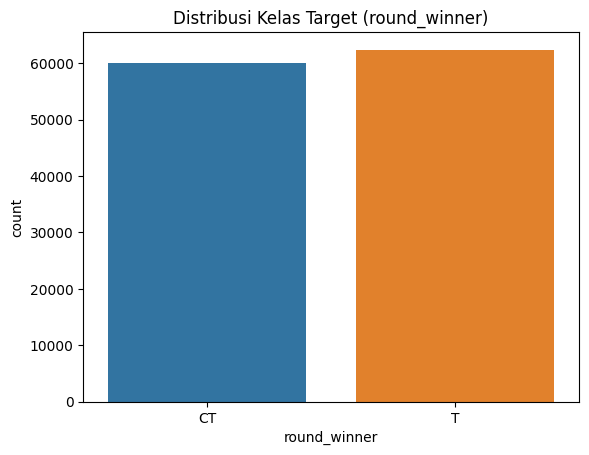

ValueError: could not convert string to float: 'de_dust2'

In [38]:
print(df.describe())

# Distribusi kelas pada target
sns.countplot(x='round_winner', data=df)
plt.title('Distribusi Kelas Target (round_winner)')
plt.show()

# Visualisasi korelasi antar fitur
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

# print(df.describe()): Ini memberikan statistik deskriptif dari dataframe, termasuk rata-rata, deviasi standar, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik.

sns.countplot(x='round_winner', data=df): Ini membuat plot batang yang menunjukkan distribusi kelas pada target 'round_winner'. Ini membantu Anda melihat seimbang atau ketidakseimbangan kelas.

plt.title('Distribusi Kelas Target (round_winner)'): Menambahkan judul pada plot distribusi kelas.

sns.heatmap(corr_matrix, annot=True): Ini membuat peta panas (heatmap) dari matriks korelasi antar fitur. Korelasi mengukur sejauh mana dua variabel bergerak bersama-sama. Peta panas memberikan pandangan visual yang bagus tentang hubungan ini.

plt.title('Matriks Korelasi Antar Fitur'): Menambahkan judul pada plot matriks korelasi.

In [57]:
ordinal_encoder = OrdinalEncoder()
df['time_left'] = ordinal_encoder.fit_transform(df[['round_winner']])

onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['round_winner']].values.reshape(-1, 1)).toarray()
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['round_winner']))
df = pd.concat([df, onehot_df], axis=1)

In [60]:
numerical_features = df.select_dtypes(['int64', 'float64']).columns
encoded_features = ['round_encoded'] + list(onehot_df.columns)
selected_features = list(numerical_features) + encoded_features

# A. Supervised Learning

In [25]:
X = df[['time_left', 'ct_score']]
y = df['round_winner']

# X = df[['time_left', 'ct_score']]: 
X adalah variabel yang menampung fitur atau atribut yang akan digunakan untuk melatih mode .
df[['time_left', 'ct_score']] memilih dua kolom, yaitu 'time_left' dan 'ct_score', dari DataFrame  f.
Ini menghasilkan DataFrame baru (X) yang berisi fitur-fitur yang akan digunakan untuk melatih model. 

# y = df['round_winner']: 
y adalah variabel yang menampung label atau target yang ingin diprediksi oleh model. df['round_winner'] memilih kolom 'round_winner' dari DataFrame df.
Ini menghasilkan Series (y) yang berisi label yang ingin diprediksi oleh model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train, X_test, y_train, y_test: Empat variabel yang akan menampung hasil dari pembagian dataset.

X_train dan y_train akan berisi set pelatihan untuk fitur dan label.
X_test dan y_test akan berisi set pengujian untuk fitur dan label.
train_test_split(X, y, test_size=0.3, random_state=42):

X dan y adalah fitur dan label yang akan dibagi.
test_size=0.3 menentukan proporsi data yang akan dialokasikan untuk set pengujian (dalam hal ini, 30%).
random_state=42 digunakan untuk memberikan reproduktibilitas pada pembagian data, sehingga setiap kali Anda menjalankan kode ini, Anda akan mendapatkan pembagian yang sama jika random_state tetap.

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_classification = df[['time_left', 'ct_score']]
y_classification = df['round_winner']

In [73]:
X_regression = df[['ct_score', 't_score']]  
y_regression = df['round_winner']
df = df.dropna(subset=['round_winner'])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 85687

# scaler = StandardScaler():

Membuat objek StandardScaler, yang akan digunakan untuk melakukan penskalaan fitur dengan standar skor (z-score).
X_train = scaler.fit_transform(X_train):

# Menggunakan set pelatihan (X_train) untuk menghitung mean dan standar deviasi yang diperlukan untuk penskalaan.
Menggunakan nilai-nilai tersebut untuk melakukan penskalaan pada set pelatihan.
X_test = scaler.transform(X_test):

# Menggunakan mean dan standar deviasi yang dihitung dari set pelatihan (X_train) untuk melakukan penskalaan pada set pengujian (X_test).
Penting untuk menggunakan parameter yang sama yang digunakan untuk set pelatihan agar scaling konsisten.

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# svc = SVC():

Membuat objek Support Vector Classification (SVC), yang merupakan model untuk tugas klasifikasi menggunakan metode Support Vector Machines (SVM).
svc.fit(X_train, y_train):

Melatih model SVC dengan menggunakan set pelatihan.
X_train berisi fitur-fitur dari data pelatihan.
y_train berisi label atau kelas yang sesuai dengan setiap sampel dalam data pelatihan.
y_pred = svc.predict(X_test):

Menggunakan model yang sudah dilatih untuk melakukan prediksi pada set pengujian.
X_test berisi fitur-fitur dari data pengujian.
Hasil prediksi disimpan dalam variabel y_pred.

In [59]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_rep)

Accuracy: 0.55
              precision    recall  f1-score   support

          CT       0.53      0.69      0.60     18054
           T       0.58      0.41      0.48     18669

    accuracy                           0.55     36723
   macro avg       0.55      0.55      0.54     36723
weighted avg       0.55      0.55      0.54     36723



# accuracy = accuracy_score(y_test, y_pred):

Menggunakan fungsi accuracy_score dari scikit-learn untuk menghitung akurasi model.
y_test adalah label sebenarnya dari set pengujian.
y_pred adalah hasil prediksi yang diberikan oleh model.
Hasil akurasi disimpan dalam variabel accuracy.
classification_rep = classification_report(y_test, y_pred):

Menggunakan fungsi classification_report dari scikit-learn untuk menghasilkan laporan klasifikasi.
y_test adalah label sebenarnya dari set pengujian.
y_pred adalah hasil prediksi yang diberikan oleh model.
Hasil laporan klasifikasi disimpan dalam variabel classification_rep.
print(f'Accuracy: {accuracy:.2f}'):

Mencetak akurasi dengan format dua desimal.
Memberikan informasi seberapa baik model dapat memprediksi kelas pada data pengujian.
print(classification_rep):

Mencetak laporan klasifikasi.
Laporan klasifikasi mencakup informasi seperti presisi, recall, F1-score, dan dukungan untuk setiap kelas. Ini memberikan gambaran rinci tentang kinerja model untuk setiap kelas.

In [39]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
classification_rep_rbf = classification_report(y_test, y_pred_rbf)
print(f'Accuracy (RBF Kernel): {accuracy_rbf:.2f}')
print(classification_rep_rbf)

Accuracy (RBF Kernel): 0.55
              precision    recall  f1-score   support

          CT       0.53      0.69      0.60     18054
           T       0.58      0.41      0.48     18669

    accuracy                           0.55     36723
   macro avg       0.55      0.55      0.54     36723
weighted avg       0.55      0.55      0.54     36723



In [30]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[12441  5613]
 [10984  7685]]


# confusion = confusion_matrix(y_test, y_pred):

Menggunakan fungsi confusion_matrix dari scikit-learn untuk menghitung matriks kebingungan.
y_test adalah label sebenarnya dari set pengujian.
y_pred adalah hasil prediksi yang diberikan oleh model.
Hasil matriks kebingungan disimpan dalam variabel confusion.
print(confusiengujian.

# A1. Support Vector Classifier (SVC) for Classification

In [70]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

scaler_classification = StandardScaler()
X_train_classification = scaler_classification.fit_transform(X_train_classification)
X_test_classification = scaler_classification.transform(X_test_classification)

svc_classification = SVC()
svc_classification.fit(X_train_classification, y_train_classification)
y_pred_classification = svc_classification.predict(X_test_classification)

accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
classification_rep_classification = classification_report(y_test_classification, y_pred_classification)

print(f'Accuracy (SVC): {accuracy_classification:.2f}')
print(classification_rep_classification)

Accuracy (SVC): 1.00
              precision    recall  f1-score   support

          CT       1.00      1.00      1.00     18054
           T       1.00      1.00      1.00     18669

    accuracy                           1.00     36723
   macro avg       1.00      1.00      1.00     36723
weighted avg       1.00      1.00      1.00     36723



# A3 Plotting for Classification and Regression

C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

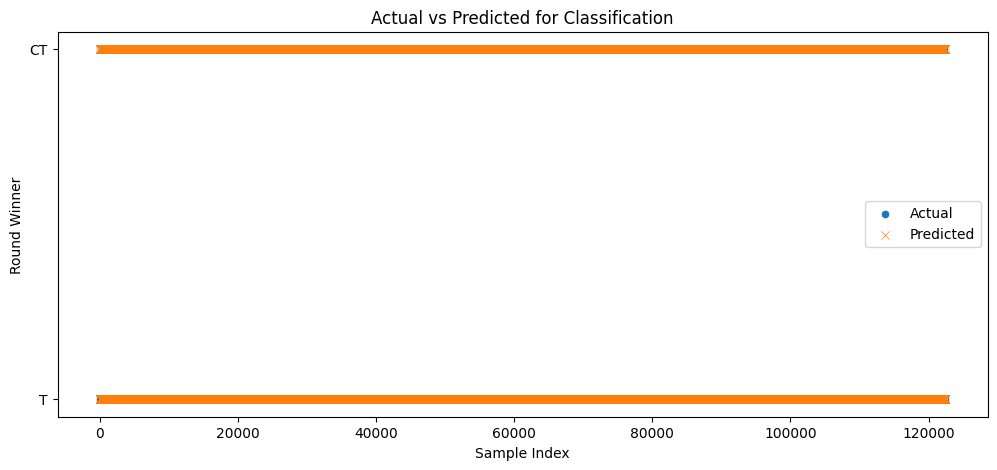

C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


NameError: name 'y_pred_regression' is not defined

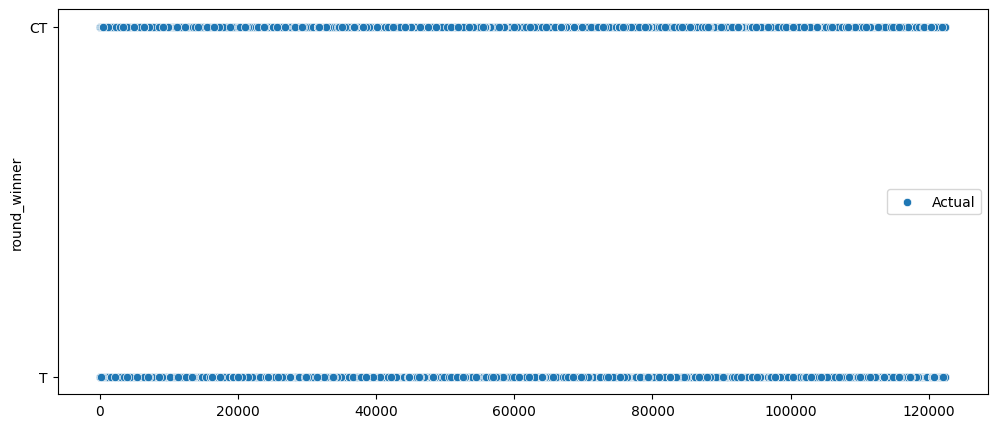

In [72]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_test_classification.index, y=y_test_classification, label='Actual', marker='o')
sns.scatterplot(x=y_test_classification.index, y=y_pred_classification, label='Predicted', marker='x')
plt.title('Actual vs Predicted for Classification')
plt.xlabel('Sample Index')
plt.ylabel('Round Winner')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_test_regression.index, y=y_test_regression, label='Actual', marker='o')
sns.scatterplot(x=y_test_regression.index, y=y_pred_regression, label='Predicted', marker='x')
plt.title('Actual vs Predicted for Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Numeric')
plt.legend()
plt.show()

# B.Unsupervised Learning

In [31]:
from sklearn.preprocessing import StandardScaler
import numpy as np

Text(50.722222222222214, 0.5, 'Aktual')

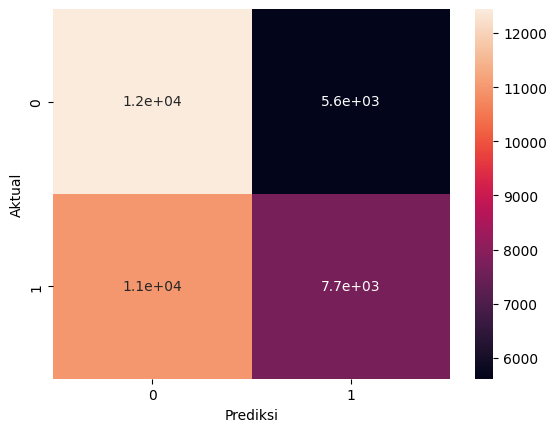

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# cm = confusion_matrix(y_test, y_pred):

Menggunakan fungsi confusion_matrix dari scikit-learn untuk menghitung matriks
y_test adalah label sebenarnya dari set pengujian.
y_pred adalah hasil prediksi yang diberikan oleh model.
Hasil matriks kebingungan disimpan dalam variabel cm.
sns.heatmap(cm, annot=True):

Menggunakan seaborn (dengan alias sns) untuk membuat peta 
Parameter annot=True digunakan untuk menampilkan nilai-nilai dalam sel matriks sebagai anotasi.
plt.xlabel('Prediksi') dan plt.ylabel('Aktual'):

In [33]:
from sklearn.cluster import KMeans

# from sklearn.cluster import KMeans:
Mengimpor kelas KMeans dari modul sklearn.cluster di scikit-learn.
Algoritma K-Means adalah salah satu metode clustering yang populer dan sederhana yang digunakan untuk mengelompokkan data menjadi beberapa kelompok atau klaster.

C:\Users\marnk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
3    69855
4    13374
2    11711
5     9464
0     7423
1     6943
6     3640
Name: count, dtype: int64


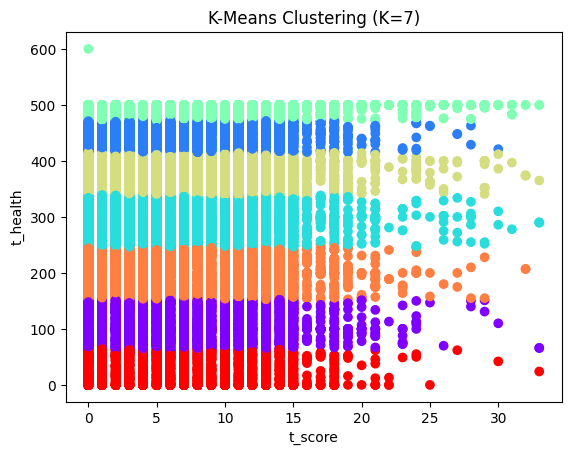

In [34]:
df = pd.read_csv('csgo_round_snapshots.csv')
X = df[['t_score', 't_health']] 
K = 7

kmeans = KMeans(n_clusters=K, random_state=0)

df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

plt.scatter(X['t_score'], X['t_health'], c=df['cluster'], cmap='rainbow')
plt.xlabel('t_score')
plt.ylabel('t_health')
plt.title('K-Means Clustering (K={})'.format(K))
plt.show()

#  df = pd.read_csv('csgo_round_snapshots.csv'):

Membaca dataset dari file CSV ('csgo_round_snapshots.csv') dan menyimpannya dalam DataFrame df.
X = df[['t_score', 't_health']]:

Memilih dua kolom, 't_score' dan 't_health', sebagai fitur untuk clustering.
X menjadi DataFrame yang berisi fitur-fitur tersebut.
K = 7:

Menentukan jumlah klaster (K) yang diinginkan, dalam hal ini 7 klaster.
kmeans = KMeans(n_clusters=K, random_state=0):

Membuat objek KMeans dengan jumlah klaster yang ditentukan dan menetapkan nilai random_state untuk reproducibility.
df['cluster'] = kmeans.fit_predict(X):

Menggunakan metode fit_predict untuk melakukan clustering dan menambahkan kolom 'cluster' ke DataFrame df untuk menunjukkan klaster dari setiap baris.
print(df['cluster'].value_counts()):

Mencetak jumlah data dalam setiap klaster menggunakan value_counts().
plt.scatter(X['t_score'], X['t_health'], c=df['cluster'], cmap='rainbow'):

Membuat scatter plot dari fitur 't_score' dan 't_health', dengan warna klaster yang ditentukan oleh kolom 'cluster'.
Warna klaster diambil dari peta warna 'rainbow'.
plt.xlabel('t_score') dan plt.ylabel('t_health'):

Menambahkan label sumbu x dan y pada scatter plot.
plt.title('K-Means Clustering (K={})'.format(K)):

Menambahkan judul plot dengan menyertakan jumlah klaster yang digunakan.
plt.show():

Menampilkan scatter plot hasil clustering.

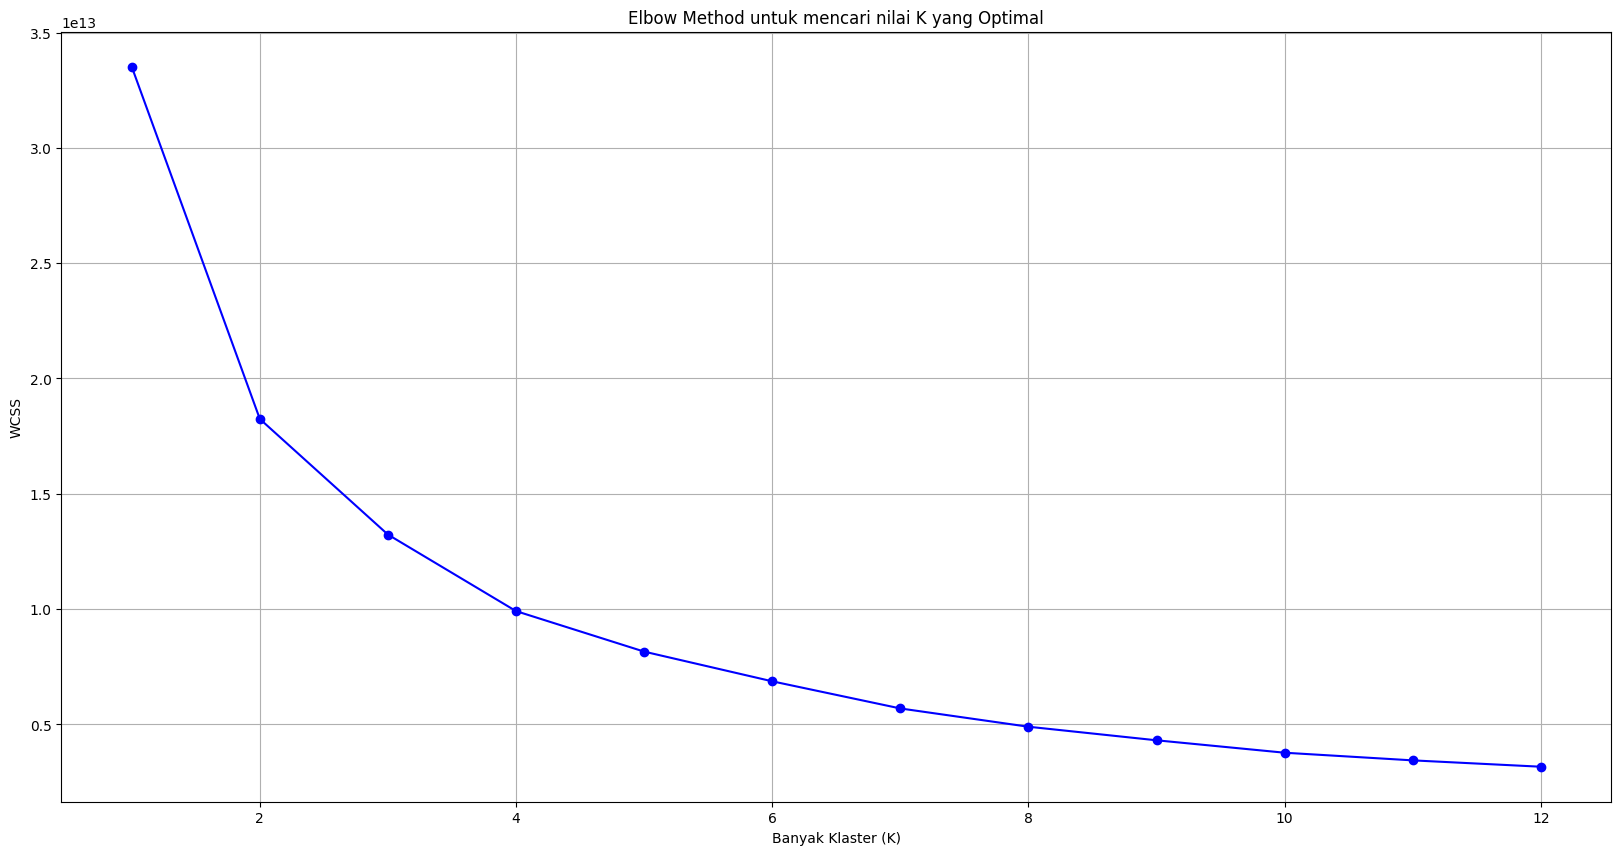

In [36]:
X = df.select_dtypes(['int64' , 'float64']).values
wcss = []

for k in range(1, 13):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# X = df.select_dtypes(['int64' , 'float64']).values:

Memilih semua kolom dengan tipe data integer dan float dari DataFrame df dan mengonversikannya menjadi array NumPy.
X menjadi array yang berisi nilai numerik dari dataset.
wcss = []:

Membuat sebuah list kosong wcss untuk menyimpan nilai WCSS (Within-Cluster-Sum-of-Squares) untuk setiap jumlah klaster.
for k in range(1, 13)::

Melakukan iterasi untuk nilai K dari 1 hingga 12 (atau angka yang telah ditentukan).
WCSS diukur untuk masing-masing nilai K.
model = KMeans(n_clusters=k, n_init=10, random_state=0):

Membuat objek KMeans dengan jumlah klaster sebanyak k.
n_init=10 menunjukkan jumlah kali algoritma K-Means dijalankan dengan pusat klaster yang berbeda untuk menghindari hasil yang dipengaruhi oleh inisialisasi yang acak.
random_state=0 digunakan untuk memberikan reproduktibilitas pada inisialisasi pusat klaster.
model.fit(X):

Melatih model K-Means menggunakan data numerik X.
wcss.append(model.inertia_):

Menambahkan nilai WCSS (inertia) dari model saat ini ke dalam list wcss.
Inertia adalah jumlah kuadrat jarak antara titik data dan pusat klaster terdekat.
plt.figure(figsize=(20, 10)):

Membuat plot dengan ukuran gambar yang besar.
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b'):

Membuat plot untuk menunjukkan bagaimana WCSS berubah seiring dengan jumlah klaster (K).
Pada metode siku-siku, mencari lokasi "siku" pada kurva yang menunjukkan penurunan WCSS yang melambat, menandakan bahwa penambahan klaster lebih lanjut memberikan manfaat yang berkurang.
plt.title('Elbow Method untuk mencari nilai K yang Optimal'):

Menambahkan judul plot.
plt.xlabel('Banyak Klaster (K)') dan plt.ylabel('WCSS'):

Menambahkan label sumbu x dan y pada plot.
plt.grid(True):

Menambahkan garis grid pada plot.
plt.show():

Menampilkan plot.